# Introduction
## Goal. 
The goal of this lab is to study the application of Genetic Programming (GP) to various kinds of problems. We will also investigate the parametrization of the algorithm and its effect on the algorithmic performance. This lab continues the use of the deap$^{[1]}$ framework for the Python programming language we have seen in the previous lab. All the exercises are based on examples taken from the deap tutorial on Genetic Programming$^{[2]}$. If you did not participate in the previous lab, you may want to look that over first and then start this lab’s exercises.

--- 

[1]: Distributed Evolutionary Algorithms in Python: https://github.com/DEAP/deap

[2]: GP tutorials: https://deap.readthedocs.io/en/master/tutorials/advanced/gp.html

# Exercise 1
In this exercise we will use GP as a supervised Machine Learning (ML) technique for solving one of the classical problems where GP has shown the most straightforward and successful applications: symbolic regression. Symbolic regression is a form of function approximation that consists in fitting some data in the form of input-output samples to determine an expression (a symbolic formula) that approximates those samples. 
Assuming a set $S$ of $N$ samples $(S = {s_1, s_2, . . . , s_N })$, where each sample is composed of an n-dimensional input and a scalar output $y$, in the following form:

<center>$s_1 : [x_1, x_2, . . . , x_n] → y_1$
<center>$s_2 : [x_1, x_2, . . . , x_n] → y_2$
<center>$· · ·$
<center>$s_N : [x_1, x_2, . . . , x_n] → y_N$

the goal is to find an expression $f(·)$ such that $y = f(x_1, x_2, . . . , x_n) \forall s \in S$. Usually, an error metric such as the MSE (Mean Squared Error), $MSE= \frac{1}{N}\sum_{i \in N}[y - f(x_1, x_2, . . ., x_n)]^2$, is used to measure an individual’s fitness in terms of approximation error.

Here, we will consider a 1-dimensional input ($n = 1$), such that the set of samples is composed of couples $(x, y)$. By default, $N = 20$ equidistant samples are generated in the range $[−1, 1]$ by means of the polynomial function: 
    
<center> $y = f^{*}(x) = x^4 + x^3 + x^2 + x$

These samples are then used to evaluate the fitness of the evolving GP trees. The goal is to find an optimal tree describing a formula that approximates $f^{*}(·)$ such that the MSE is minimized$^{[1]}$.
The next cell contains the main code. Take a look at it and spend some time to understand its main steps.

One of the most important aspects is the definition of the *primitive set* (also called  non-terminal or function set), which in this case contains the four basic arithmetic operations, the trigonometric functions `cos` and `sin`, and the `neg` operator (such that `neg(x)=-x`). Note that the standard division operator is replaced by a custom function named `protectedDiv`, which handles divisions by zero without returning errors (this detail is often very important in GP-based symbolic regression, where it's not possible to check a priori all possible inputs to a division node). Note also that in `deap` the configuration of the Evolutionary Algorithm (in this case, Genetic Programming) is obtained by means of a series of function hooks registered in a `creator` object (that handles the initialization of the individual genotypes with their fitness values) and a `toolbox` object (that handles all the other methods that are called during the algorithm execution: evaluation, selection, mutation, crossover, etc.). All function hooks come with a user-defined alias (the first argument of the methods `create`, `register` and `decorate`). The evaluation of the fitness function (in this case, the MSE) is implemented in the method `evalSymbReg`, that calls the method `generatorFunction` (the only part of code you should change if you want to test a different generator function).

![tree.png](img/img_11/tree.png)

The relevant parameters of the Genetic Programming algorithm can be found at the beginning of the script. In particular, consider the parameters `GP_POP_SIZE`, `GP_NGEN`, `GP_CXPB`, `GP_MUTPB`,`GP_TRNMT_SIZE`, and `GP_HOF_SIZE`. These parameters represent, respectively: the population size (`GP_POP_SIZE`),  the number of generations (`GP_NGEN`), the crossover probability (`GP_CXPB`), the mutation probability (`GP_MUTPB`), the tournament size (`GP_TRNMT_SIZE`) and the size of the Hall-of-Fame (`GP_HOF_SIZE`)$^{[2]}$. See the documentation$^{[3]}$ for further explanations on the implementation details of this exercise.

At the end of the run, the script will show you (and save on files, in the `results` folder) a graphical representation$^{[4]}$ of the best evolved tree (similar to that shown in the figure above), as well as a comparison between the values of the real and GP-approximated data, and the evolutionary trends of the trees' fitness and size (i.e., number of nodes) across generations, see the figure below.

![tree.png](img/img_11/symbreg_merged.png)
    
- Is the GP algorithm able to approximate the given polynomial, with the standard configuration? What happens when you run the script multiple times? Do you always obtain the same results, or not? Why?
    
- Try to change the generator function (e.g. to include trigonometric functions) defined in the method `generatorFunction`. Is the GP algorithm able to approximate more complicated generator functions? Which parameters can you change to improve the results?

---
    
[1]: Note that while in this synthetic example we know that samples are generated by a certain \emph{generator function} $f^*(\cdot)$, in practical applications we don't know if this function even exists -or has a meaningful physical/mathematical formulation. In other words, the goal of GP is to approximate the mapping between inputs and outputs in a purely data-driven approach.
    
[2]: Note that *deap* uses a structure called Hall-of-Fame to store the best individual(s) found during the evolutionary process. The size of this archive is determined by the parameter `GP_HOF_SIZE`. This structure is only used to report the best solutions at the end of the evolutionary process, and it is not to be confused with the Hall-of-Fame used in competitive co-evolution.
    
[3]: See https://deap.readthedocs.io/en/master/examples/gp_symbreg.html
    
[4]: The Python packages `pygraphviz` and `networkx` are required for this.

In [38]:
# Note: this cell will install the dependencies pygraphviz and networkx
# If you are using Windows, please follow the instructions that you will find here: 
#       https://pygraphviz.github.io/documentation/stable/install.html#windows
# If you are still not able to import pygraphviz due to an error like:
# 'ImportError: DLL load failed while importing _graphviz'
# you may solve this error by adding e.g. "C:\Program Files\Graphviz\bin" to the PATH environment variable.
!python -m pip install networkx
#!sudo apt-get install graphviz graphviz-dev
!pip install pygraphviz
import warnings
warnings.filterwarnings('ignore')

  Using cached pygraphviz-1.14.tar.gz (106 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
Failed to build pygraphviz


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\carlo\AppData\Local\Programs\Python\Python311\python.exe' 'C:\Users\carlo\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\pep517\_in_process.py' build_wheel 'C:\Users\carlo\AppData\Local\Temp\tmp763nirc8'
       cwd: C:\Users\carlo\AppData\Local\Temp\pip-install-6ib_72w6\pygraphviz_f31f9ded2c9e4fe88155fa73266210de
  Complete output (54 lines):
  running bdist_wheel
  running build
  running build_py
  creating build\lib.win-amd64-cpython-311\pygraphviz
  copying pygraphviz\agraph.py -> build\lib.win-amd64-cpython-311\pygraphviz
  copying pygraphviz\graphviz.py -> build\lib.win-amd64-cpython-311\pygraphviz
  copying pygraphviz\scraper.py -> build\lib.win-amd64-cpython-311\pygraphviz
  copying pygraphviz\testing.py -> build\lib.win-amd64-cpython-311\pygraphviz
  copying pygraphviz\__init__.py -> build\lib.win-amd64-cpython-311\pygraphviz
  creating build\lib.win-amd64-cpython-311\pygraphviz\tests



------------------------------------------------------------------------------------------------
run1 {'FUNZIONE': 1, 'GP_POP_SIZE': 300, 'GP_NGEN': 40, 'GP_CXPB, GP_MUTPB': (0.5, 0.1), 'GP_TRNMT_SIZE': 3, 'GP_HOF_SIZE': 1}
   	      	                       fitness                       	                      size                     
   	      	-----------------------------------------------------	-----------------------------------------------
gen	nevals	avg    	gen	max    	min     	nevals	std  	avg    	gen	max	min	nevals	std    
0  	300   	16.2989	0  	4333.84	0.328818	300   	249.7	3.58667	0  	7  	2  	300   	1.53704
1  	166   	1.26615	1  	15.5535	0.328818	166   	1.55302	3.87   	1  	12 	1  	166   	1.89906
2  	158   	1.21444	2  	67.687 	0.165572	158   	4.10758	3.95667	2  	11 	1  	158   	1.8443 
3  	157   	0.813771	3  	4.19956	0.165572	157   	0.616275	4.07   	3  	10 	1  	157   	1.96937
4  	169   	0.788807	4  	6.75122	0.165572	169   	0.747099	4.5    	4  	13 	1  	169   	2.15019
5  	159 

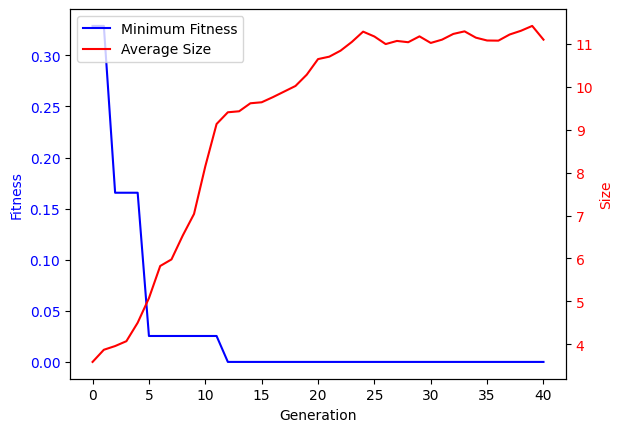

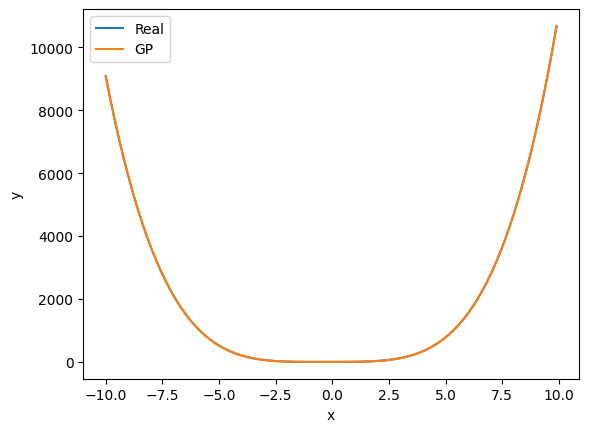

Best individual GP for run1 is mul(add(1, x), mul(add(1, mul(x, x)), x)), fitness: (1.3491139260432587e-32,)


------------------------------------------------------------------------------------------------
run2 {'FUNZIONE': 2, 'GP_POP_SIZE': 300, 'GP_NGEN': 40, 'GP_CXPB, GP_MUTPB': (0.5, 0.1), 'GP_TRNMT_SIZE': 3, 'GP_HOF_SIZE': 1}
   	      	                        fitness                        	                      size                     
   	      	-------------------------------------------------------	-----------------------------------------------
gen	nevals	avg    	gen	max    	min     	nevals	std    	avg    	gen	max	min	nevals	std    
0  	300   	16.2422	0  	4388.63	0.041532	300   	252.873	3.58667	0  	7  	2  	300   	1.53704
1  	179   	1.04293	1  	18.0898	0.041532	179   	2.13523	3.53333	1  	9  	1  	179   	1.62138
2  	167   	0.636246	2  	18.0898	0.00379273	167   	1.42694	3.62333	2  	11 	1  	167   	1.79855
3  	162   	0.535888	3  	14.6146	0.00379273	162   	1.09478	3.94333	3  	11

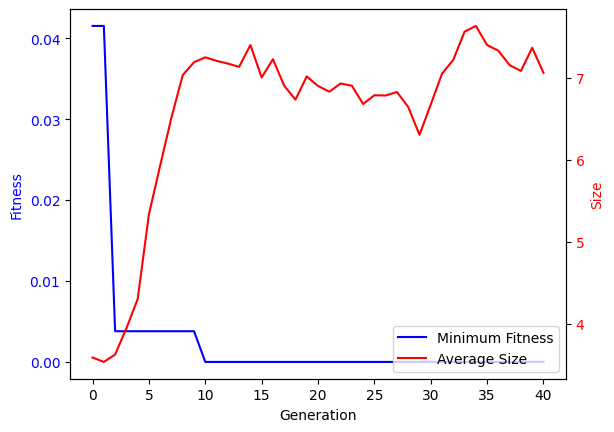

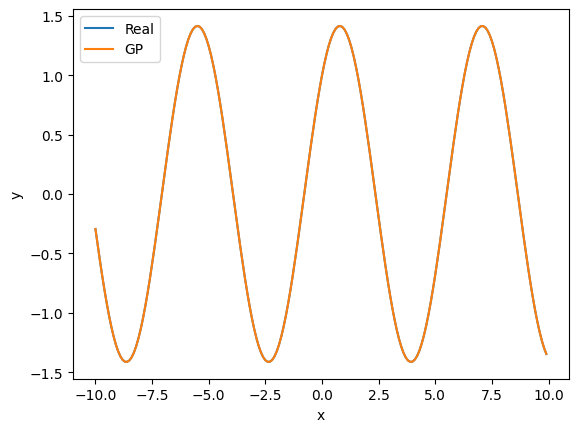

Best individual GP for run2 is sub(cos(x), neg(sin(x))), fitness: (0.0,)


------------------------------------------------------------------------------------------------
run3 {'FUNZIONE': 3, 'GP_POP_SIZE': 300, 'GP_NGEN': 40, 'GP_CXPB, GP_MUTPB': (0.5, 0.1), 'GP_TRNMT_SIZE': 3, 'GP_HOF_SIZE': 1}
   	      	                       fitness                       	                      size                     
   	      	-----------------------------------------------------	-----------------------------------------------
gen	nevals	avg    	gen	max    	min      	nevals	std  	avg    	gen	max	min	nevals	std    
0  	300   	15.5876	0  	4327.94	0.0573183	300   	249.4	3.58667	0  	7  	2  	300   	1.53704
1  	170   	0.566928	1  	16.2151	0.050224 	170   	1.56858	3.61667	1  	12 	1  	170   	1.81008
2  	176   	0.272726	2  	4.66353	0.050224 	176   	0.402881	3.37667	2  	14 	1  	176   	1.8041 
3  	182   	0.276245	3  	4.05673	0        	182   	0.423253	3.01   	3  	14 	1  	182   	1.64618
4  	181   	0.188612

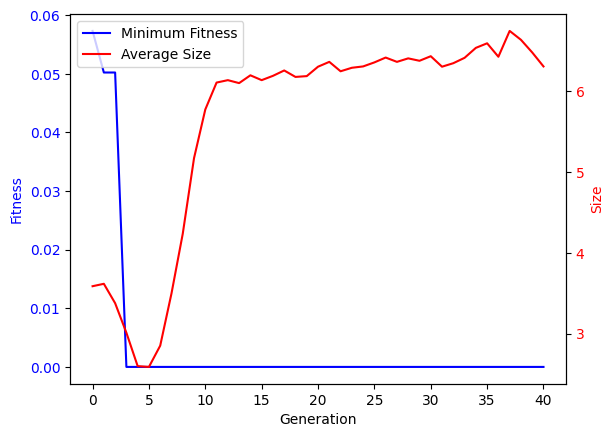

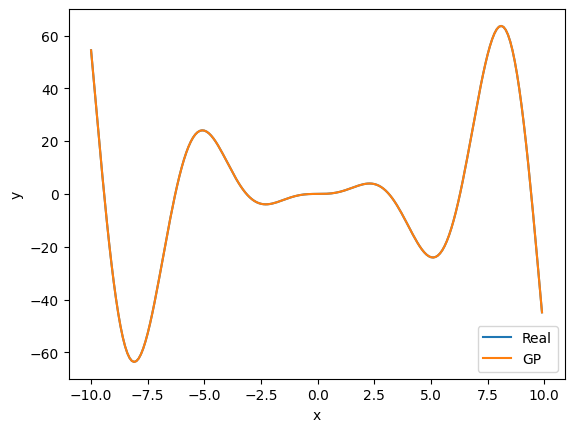

Best individual GP for run3 is mul(sin(x), mul(x, x)), fitness: (0.0,)


------------------------------------------------------------------------------------------------
run4 {'FUNZIONE': 4, 'GP_POP_SIZE': 500, 'GP_NGEN': 100, 'GP_CXPB, GP_MUTPB': (0.5, 0.1), 'GP_TRNMT_SIZE': 3, 'GP_HOF_SIZE': 1}
   	      	                    fitness                    	                      size                     
   	      	-----------------------------------------------	-----------------------------------------------
gen	nevals	avg    	gen	max    	min    	nevals	std    	avg  	gen	max	min	nevals	std    
0  	500   	14.1368	0  	4351.76	2.05333	500   	194.222	3.622	0  	7  	2  	500   	1.52549
1  	284   	6.11737	1  	1077.56	1.83035	284   	48.0066	3.64 	1  	11 	1  	284   	1.61443
2  	294   	3.86621	2  	20.3607	1.59427	294   	2.60023	3.844	2  	14 	1  	294   	1.73311
3  	268   	5.51482	3  	763.189	1.59427	268   	34.3054	4.08 	3  	14 	1  	268   	1.87019
4  	284   	3.5385 	4  	21.7253	1.59427	284   	2.64277

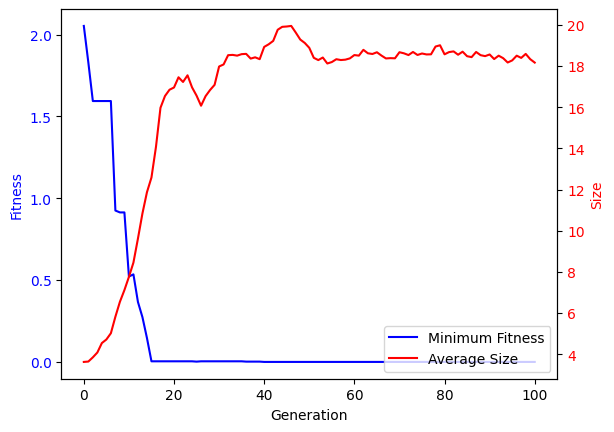

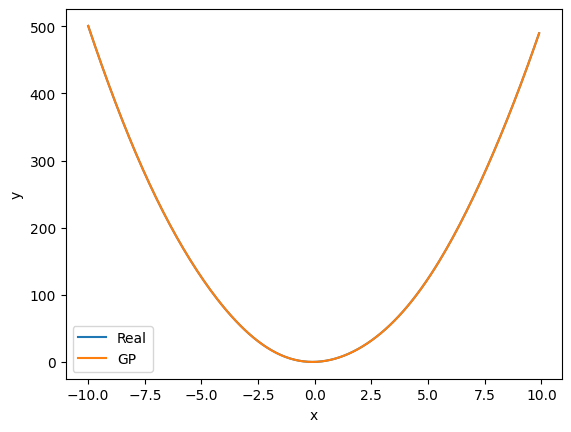

Best individual GP for run4 is add(mul(add(add(x, x), add(x, add(protectedDiv(0, x), x))), x), mul(add(protectedDiv(sin(x), x), x), x)), fitness: (9.863168727693131e-33,)


In [39]:
import sys
import time
import operator
import math
import random

import numpy

from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp
import os


runs = {'run1': {'FUNZIONE': 1, 'GP_POP_SIZE': 300, 'GP_NGEN':40,  'GP_CXPB, GP_MUTPB': (0.5, 0.1), 'GP_TRNMT_SIZE': 3, 'GP_HOF_SIZE':1},
        'run2': {'FUNZIONE': 2, 'GP_POP_SIZE': 300, 'GP_NGEN':40,  'GP_CXPB, GP_MUTPB': (0.5, 0.1), 'GP_TRNMT_SIZE': 3, 'GP_HOF_SIZE':1},
        'run3': {'FUNZIONE': 3, 'GP_POP_SIZE': 300, 'GP_NGEN':40,  'GP_CXPB, GP_MUTPB': (0.5, 0.1), 'GP_TRNMT_SIZE': 3, 'GP_HOF_SIZE':1},
        'run4': {'FUNZIONE': 4, 'GP_POP_SIZE': 500, 'GP_NGEN':100,  'GP_CXPB, GP_MUTPB': (0.5, 0.1), 'GP_TRNMT_SIZE': 3, 'GP_HOF_SIZE':1}
        }

"""
-------------------------------------------------------------------------
Edit this part to do the exercises
"""
for run in runs:
    print('\n\n------------------------------------------------------------------------------------------------')
    print(run, runs[run])

    GP_POP_SIZE = runs[run]['GP_POP_SIZE']               # population size for GP
    GP_NGEN = runs[run]['GP_NGEN']                     # number of generations for GP
    GP_CXPB, GP_MUTPB = runs[run]['GP_CXPB, GP_MUTPB']     # crossover and mutation probability for GP
    GP_TRNMT_SIZE = runs[run]['GP_TRNMT_SIZE']                # tournament size for GP
    GP_HOF_SIZE = runs[run]['GP_HOF_SIZE']                  # size of the Hall-of-Fame for GP
    FUNZIONE = runs[run]['FUNZIONE']
    seed = 0

    folder = 'results'

    def protectedDiv(left, right):
        try:
            return left / right
        except ZeroDivisionError:
            return 1

    pset = gp.PrimitiveSet("MAIN", 1)
    pset.addPrimitive(operator.add, 2)
    pset.addPrimitive(operator.sub, 2)
    pset.addPrimitive(operator.mul, 2)
    pset.addPrimitive(protectedDiv, 2)
    pset.addPrimitive(operator.neg, 1)
    pset.addPrimitive(math.cos, 1)
    pset.addPrimitive(math.sin, 1)
    pset.addEphemeralConstant("rand101", lambda: random.randint(-1, 1))
    pset.renameArguments(ARG0='x')

    try:
        del creator.FitnessMinSR
        del creator.IndividualSR
    except:
        pass

    creator.create("FitnessMinSR", base.Fitness, weights=(-1.0,))
    creator.create("IndividualSR", gp.PrimitiveTree, fitness=creator.FitnessMinSR)

    toolbox = base.Toolbox()
    toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
    toolbox.register("individual", tools.initIterate, creator.IndividualSR, toolbox.expr)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("compile", gp.compile, pset=pset)

    def generatorFunction(x):
        if FUNZIONE == 1:
            return x**4 + x**3 + x**2 + x
        elif FUNZIONE == 2:
            return math.sin(x) + math.cos(x)
        elif FUNZIONE == 3:
            return math.sin(x) * x**2
        elif FUNZIONE == 4:
            return math.sin(x) + 5 * x**2

    def evalSymbReg(individual, points):
        gpFunction = toolbox.compile(expr=individual)
        sqerrors = ((gpFunction(x) - generatorFunction(x))**2 for x in points)
        return math.fsum(sqerrors) / len(points),

    toolbox.register("evaluate", evalSymbReg, points=[x/10. for x in range(-10, 10)])
    toolbox.register("select", tools.selTournament, tournsize=GP_TRNMT_SIZE)
    toolbox.register("mate", gp.cxOnePoint)
    toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
    toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)
    toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
    toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))

    random.seed(seed)

    pop = toolbox.population(n=GP_POP_SIZE)
    hof = tools.HallOfFame(GP_HOF_SIZE)

    stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
    stats_size = tools.Statistics(len)
    mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
    mstats.register("avg", numpy.mean)
    mstats.register("std", numpy.std)
    mstats.register("min", numpy.min)
    mstats.register("max", numpy.max)

    final_pop, logbook = algorithms.eaSimple(pop, toolbox, GP_CXPB, GP_MUTPB, GP_NGEN, 
                                             stats=mstats, halloffame=hof, verbose=True)

    # Plot fitness vs size trends
    import matplotlib.pyplot as plt

    gen = logbook.select("gen")
    fit_mins = logbook.chapters["fitness"].select("min")
    size_avgs = logbook.chapters["size"].select("avg")

    fig = plt.figure(f"GP (fitness and tree size trend) - {run}")
    ax1 = fig.add_subplot(111)
    line1 = ax1.plot(gen, fit_mins, "b-", label="Minimum Fitness")
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness", color="b")
    for tl in ax1.get_yticklabels():
        tl.set_color("b")

    ax2 = ax1.twinx()
    line2 = ax2.plot(gen, size_avgs, "r-", label="Average Size")
    ax2.set_ylabel("Size", color="r")
    for tl in ax2.get_yticklabels():
        tl.set_color("r")

    lns = line1 + line2
    labs = [l.get_label() for l in lns]
    ax2.legend(lns, labs, loc=0)

    plt.savefig(folder + f'/trends_symbreg_{run}.png')
    plt.show()

    # Plot real vs approximated values
    x_ = points = [x/10. for x in range(-100, 100)]
    y_real = [generatorFunction(x) for x in x_]
    gpFunction = toolbox.compile(expr=hof[0])
    y_gp = [gpFunction(x) for x in x_]

    fig = plt.figure(f"GP (real vs approximated values) - {run}")
    ax1 = fig.add_subplot(111)
    line1 = ax1.plot(x_, y_real, label="Real")
    line2 = ax1.plot(x_, y_gp, label="GP")
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax1.legend()

    plt.savefig(folder + f'/real_vs_approximated_{run}.png')
    plt.show()

    print(f"Best individual GP for {run} is {hof[0]}, fitness: {hof[0].fitness.values}")

# Exercise 2

In this exercise we will use GP for solving different kinds of problems. In the next cells you will find various other examples of GP applications. 
Through these examples, we will see how GP can be flexibly applied to solve a broad range of problems beyond function approximation, such as classification and evolution of computer programs, with different features and levels of complexity. In particular, consider the following four cells:


 1. exercise parity: the even parity problem$^{[1]}$. This is a classical benchmark problem used in the GP literature: the goal is to _evolve a Boolean expression_ that produces the correct value of the even parity bit, given as input an array of $n$ bits. For instance, for an input size $n=6$ (Parity-6 problem), the goal is to match the parity bit value for each of the $2^6 = 64$ possible combinations of 6 bits$^{[2]}$. Thus the fitness of an individual (i.e., a candidate Boolean expression) can be calculated simply as the number of successful cases (to be maximized), such that the maximum attainable fitness is 64 in the case of 6 bits inputs. Note that since in this case all inputs/outputs are bits (Boolean values), the primitive set contains only Boolean operators (`and`, `or`, `xor`, `not`).
	
 2. exercise multiplexer: the multiplexer problem $^{[3]}$ is another classical benchmark problem used in the GP literature. Similarly to the even parity problem, this problem deals with Boolean values: the goal is _evolve a Boolean expression_ that is capable to reproduce the behavior of an electronic multiplexer (mux)$^{[4]}$. In the default configuration, a 3-8 multiplexer is used (3 select entries, labeled from A0 to A2, and 8 data entries, from D0 to D7), for a total number of $2^3\times2^8=2048$ possible combinations. Thus the fitness is the number of correct outputs over all $2048$ cases, and its maximum value is $2048$.
	
 3. exercise spambase: the ''spam base'' problem$^{[5]}$ consists in *evolving a classifier* that is able to distinguish as spam/non-spam a given database of emails	(saved in `utils/utils_11/data/spambase.csv`). The database consists of $4601$ _labeled_ samples (as such, GP is used here as a supervised ML algorithm), each corresponding to a different email and comprising $57$ mixed integer/real-valued features describing various lexicographic/syntactic characteristics of the email$^{[6]}$, in addition to a binary label indicating if the email is spam (1) or not (0). The evolved classifier must then return a Boolean value which must be `True` if the email is spam, `False` otherwise. To avoid overfitting, each tree generated during the GP run is evaluated on a set of $400$ samples randomly selected from the database (so that the maximum achievable fitness, i.e. number of correct classifications, is $400$). Note that since data of different kinds must be manipulated by the classifier (float and Boolean values), in this case the GP algorithm is configured to handle `strongly typed` operations, i.e. for each function in the primitive set the type of inputs and outputs is specified (e.g. to avoid calling a Boolean function with float	values as inputs).
	
 4. exercise ant: the ''artificial ant'' problem$^{[7]}$ consists in _evolving a program_ that can successfully control an artificial ant so that it can find and ''eat'' all the food located in a certain environment (i.e., placed along a twisting trail on a square toroidal grid). The program can use three operations, `move_forward`, `turn_right` and `turn_left`, to move the ant forward one cell, turn right or turn left. Each of these operations takes one timestep. The sensing function `if_food_ahead` looks into the cell the ant is currently facing and then executes one of its two arguments, depending upon whether that cell contains food or is empty. Two additional custom operations, `prog2` and	`prog3` are provided to facilitate the evolution of more complex behaviors. These custom operations take two and three other operations as arguments, respectively, and execute them in sequence. The evaluation function uses an instance of a simple simulator to evaluate a given individual (i.e., a candidate program). Each individual is given $600$ timesteps to navigate a virtual map obtained from an external file (see the file `utils/utils_11/data/santafe_trail.txt`, where `#`, `.` and `S` indicate, respectively, a cell with food, an empty cell, and the starting cell). The fitness of each individual corresponds to the number of pieces of food picked up. In this example, the trail contains $89$ pieces of food in total. Therefore, an optimal individual would achieve a fitness of $89$.

Since these scripts have all the same structure as the one used in the first exercise (besides obviously the details of the specific problem, especially the evaluator function, and the definition of the primitive set), we won't go into the details of each of them. You can spend some time having a look at the code and trying to get the main steps of each of the four examples.

![mux_trend.png](img/img_11/es2_merged.png)

<center>Example fitness trends for the 3-8 multiplexer problem (left) and the ''artificial ant'' problem (right).


Try to run some experiments with one or more of these four scripts. As in the previous exercise, at the end of the run each script will show you (and save on files, in the `results` folder) a graphical representation of the best evolved tree, as well as the evolutionary trends of the trees' fitness across generations, see figures above.

 1. In the case of the multiplexer problem there is an additional parameter (`MUX_SELECT_LINES`) that allows you to scale the problem, increasing or decreasing its dimensionality. Similarly, for the parity problem there is a parameter (`PARITY_FANIN_M`) that allows you to change the problem dimensionality. This in turn will make the problem easier, or harder. If you tested one of these two problems, consider changing these parameters and observe the GP's behavior. Note, however, that these problems (especially the multiplexer) become computationally very complex when the dimensionality increases, so that experiments can be quite time-consuming!
    
 2. What kind of performance do you get, in general, on the tested problems? What happens when you change the parametrization of GP? 


---
[1]: Parity problem: https://deap.readthedocs.io/en/master/examples/gp_parity.html
    
[2]: Parity wikipedia: https://en.wikipedia.org/wiki/Parity_bit
    
[3]: Multiplexer problem: https://deap.readthedocs.io/en/master/examples/gp_multiplexer.html
    
[4]: See https://en.wikipedia.org/wiki/Multiplexer for more details
    
[5]: Spam base problem: https://deap.readthedocs.io/en/master/examples/gp_spambase.html
    
[6]: See http://archive.ics.uci.edu/ml/datasets/Spambase for a complete description of the features
    
[7]: Ant problem: https://deap.readthedocs.io/en/master/examples/gp_ant.html

# Parity problem



------------------------------------------------------------------------------------------------
{'PARITY_FANIN_M': 6, 'GP_POP_SIZE': 300, 'GP_NGEN': 40, 'GP_CXPB, GP_MUTPB': (0.5, 0.2), 'GP_TRNMT_SIZE': 3, 'GP_HOF_SIZE': 1} 0
gen	nevals	avg    	std     	min	max
0  	300   	31.9567	0.735837	24 	36 
1  	177   	32.0867	0.438736	32 	36 
2  	172   	32.2367	0.883547	28 	38 
3  	184   	32.44  	1.35882 	26 	38 
4  	193   	32.8233	1.81809 	24 	40 
5  	184   	33.1233	1.97014 	26 	38 
6  	166   	33.99  	2.11264 	28 	40 
7  	166   	34.67  	2.40716 	27 	42 
8  	191   	35.39  	2.80438 	28 	42 
9  	188   	35.6567	3.40472 	24 	44 
10 	166   	36.7233	3.27823 	24 	44 
11 	195   	37.1233	3.95577 	20 	48 
12 	200   	37.7467	4.46869 	16 	48 
13 	158   	38.59  	4.57623 	22 	50 
14 	168   	39.7133	4.72417 	24 	50 
15 	193   	39.97  	5.86365 	18 	54 
16 	149   	41.9367	5.50751 	24 	54 
17 	182   	42.8167	6.75103 	16 	56 
18 	190   	43.3033	7.41247 	16 	56 
19 	184   	44.5267	7.6635  	24 	64 
20 	195   	44.7

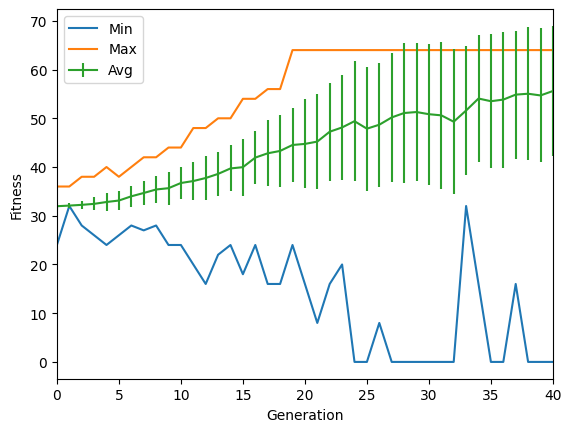

Best individual GP is xor(xor(and_(xor(xor(IN1, IN0), and_(0, IN0)), or_(and_(IN0, IN0), or_(IN0, 1))), and_(IN4, not_(not_(1)))), and_(or_(xor(xor(IN5, IN2), not_(IN3)), not_(1)), or_(and_(IN5, IN5), 1))), (64.0,)


------------------------------------------------------------------------------------------------
{'PARITY_FANIN_M': 8, 'GP_POP_SIZE': 300, 'GP_NGEN': 40, 'GP_CXPB, GP_MUTPB': (0.5, 0.2), 'GP_TRNMT_SIZE': 3, 'GP_HOF_SIZE': 1} 1
gen	nevals	avg   	std    	min	max
0  	300   	127.99	0.62442	124	136
1  	194   	128.047	0.724216	124	136
2  	176   	128.09 	1.04971 	120	136
3  	177   	128.35 	1.79095 	120	144
4  	183   	128.557	2.20154 	120	144
5  	176   	128.883	2.94896 	112	144
6  	178   	129.48 	3.63267 	120	144
7  	200   	130.333	4.52647 	112	144
8  	178   	131.153	4.78572 	112	144
9  	176   	131.93 	5.30394 	120	144
10 	175   	132.263	5.83387 	112	144
11 	200   	132.053	6.13491 	112	160
12 	165   	133.7  	7.0316  	112	160
13 	177   	134.043	7.33222 	120	160
14 	188   	133.907	7

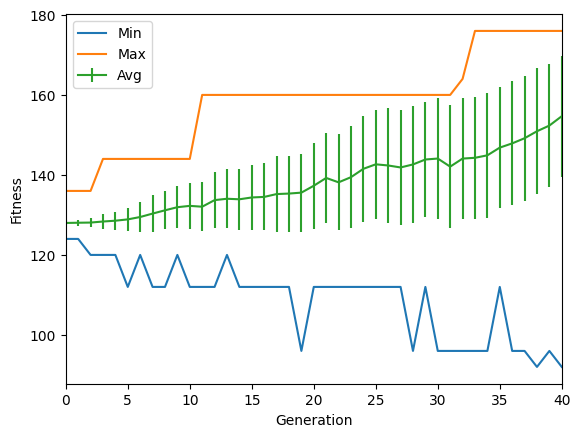

Best individual GP is xor(or_(xor(IN5, not_(IN6)), xor(not_(IN1), and_(1, IN3))), or_(not_(or_(IN0, IN2)), xor(and_(IN2, IN0), xor(IN7, IN4)))), (176.0,)


------------------------------------------------------------------------------------------------
{'PARITY_FANIN_M': 8, 'GP_POP_SIZE': 400, 'GP_NGEN': 40, 'GP_CXPB, GP_MUTPB': (0.5, 0.2), 'GP_TRNMT_SIZE': 4, 'GP_HOF_SIZE': 1} 2
gen	nevals	avg    	std     	min	max
0  	400   	127.987	0.585101	124	136
1  	223   	128.032	0.609462	122	136
2  	233   	128.1  	0.994987	112	132
3  	253   	128.373	1.0338  	124	134
4  	228   	128.863	1.50452 	122	138
5  	225   	129.61 	1.90076 	124	138
6  	241   	130.155	2.42404 	120	138
7  	256   	130.748	3.13986 	120	144
8  	236   	132.028	3.8745  	118	152
9  	258   	132.482	5.3141  	116	168
10 	255   	134.113	6.56162 	114	168
11 	231   	136.412	7.95722 	104	168
12 	241   	137.9  	10.0958 	88 	168
13 	247   	140.833	10.9574 	112	184
14 	241   	143.298	13.968  	76 	192
15 	257   	149.683	16.9067 	88 	192
16 	2

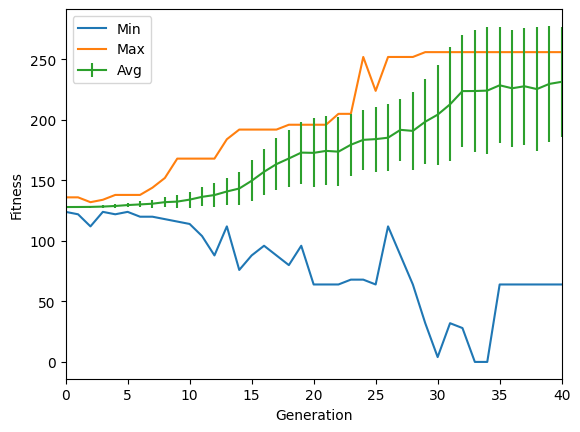

Best individual GP is xor(or_(and_(and_(and_(and_(xor(IN7, and_(IN1, IN3)), or_(xor(0, IN7), 0)), IN3), xor(IN1, IN4)), and_(or_(not_(IN3), and_(1, IN1)), or_(IN7, 1))), xor(xor(and_(IN2, IN7), and_(IN5, IN5)), xor(xor(IN0, IN1), not_(IN4)))), xor(xor(IN6, not_(xor(and_(xor(0, IN7), IN3), or_(xor(IN2, IN3), IN7)))), or_(or_(or_(1, IN1), xor(IN2, IN6)), xor(IN6, IN3)))), (256.0,)


In [40]:
import sys
import time
import random
import operator

import numpy

import utils.utils_11.plot_utils as plot_utils
from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp
#
runs = {'run1': {'PARITY_FANIN_M': 6, 'GP_POP_SIZE': 300, 'GP_NGEN':40,  'GP_CXPB, GP_MUTPB': (0.5, 0.2), 'GP_TRNMT_SIZE': 3, 'GP_HOF_SIZE':1},
        'run2': {'PARITY_FANIN_M': 8, 'GP_POP_SIZE': 300, 'GP_NGEN':40,  'GP_CXPB, GP_MUTPB': (0.5, 0.2), 'GP_TRNMT_SIZE': 3, 'GP_HOF_SIZE':1},
        'run3': {'PARITY_FANIN_M': 8, 'GP_POP_SIZE': 400, 'GP_NGEN':40,  'GP_CXPB, GP_MUTPB': (0.5, 0.2), 'GP_TRNMT_SIZE': 4, 'GP_HOF_SIZE':1},
       }

"""
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

for num,run in enumerate(runs):
    print('\n\n------------------------------------------------------------------------------------------------')
    print(runs[run], num)

    GP_POP_SIZE = runs[run]['GP_POP_SIZE']               # population size for GP
    GP_NGEN = runs[run]['GP_NGEN']                     # number of generations for GP
    GP_CXPB, GP_MUTPB = runs[run]['GP_CXPB, GP_MUTPB']     # crossover and mutation probability for GP
    GP_TRNMT_SIZE = runs[run]['GP_TRNMT_SIZE']                # tournament size for GP
    GP_HOF_SIZE = runs[run]['GP_HOF_SIZE']                  # size of the Hall-of-Fame for GP

    PARITY_FANIN_M = runs[run]['PARITY_FANIN_M']                  # input size of the Parity problem
    seed = 0
    """
    -------------------------------------------------------------------------
    """

    # Initialize Parity problem input and output matrices
    PARITY_SIZE_M = 2**PARITY_FANIN_M

    inputs = [None] * PARITY_SIZE_M
    outputs = [None] * PARITY_SIZE_M

    for i in range(PARITY_SIZE_M):
        inputs[i] = [None] * PARITY_FANIN_M
        value = i
        dividor = PARITY_SIZE_M
        parity = 1
        for j in range(PARITY_FANIN_M):
            dividor /= 2
            if value >= dividor:
                inputs[i][j] = 1
                parity = int(not parity)
                value -= dividor
            else:
                inputs[i][j] = 0
        outputs[i] = parity

    pset = gp.PrimitiveSet("MAIN", PARITY_FANIN_M, "IN")
    pset.addPrimitive(operator.and_, 2)
    pset.addPrimitive(operator.or_, 2)
    pset.addPrimitive(operator.xor, 2)
    pset.addPrimitive(operator.not_, 1)
    pset.addTerminal(1)
    pset.addTerminal(0)

    try:
        del creator.FitnessMaxParity
        del creator.IndividualParity
    except:
        pass
    creator.create("FitnessMaxParity", base.Fitness, weights=(1.0,))
    creator.create("IndividualParity", gp.PrimitiveTree, fitness=creator.FitnessMaxParity)
        
    toolbox = base.Toolbox()
    toolbox.register("expr", gp.genFull, pset=pset, min_=3, max_=5)
    toolbox.register("individual", tools.initIterate, creator.IndividualParity, toolbox.expr)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("compile", gp.compile, pset=pset)

    def evalParity(individual):
        func = toolbox.compile(expr=individual)
        return sum(func(*in_) == out for in_, out in zip(inputs, outputs)),

    toolbox.register("evaluate", evalParity)
    toolbox.register("select", tools.selTournament, tournsize=GP_TRNMT_SIZE)
    toolbox.register("mate", gp.cxOnePoint)
    toolbox.register("expr_mut", gp.genGrow, min_=0, max_=2)
    toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

    #--------------------------------------------------------------------

    random.seed(seed)

    pop = toolbox.population(n=GP_POP_SIZE)
    hof = tools.HallOfFame(GP_HOF_SIZE)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)

    final_pop,logbook=algorithms.eaSimple(pop, toolbox, GP_CXPB, GP_MUTPB, GP_NGEN, \
                                        stats, halloffame=hof)

    #--------------------------------------------------------------------

        
    nodes, edges, labels = gp.graph(hof[0])
    #plot_utils.plotTree(nodes,edges,labels,"parity"+'_'+str(seed),'results')

    # plot fitness trends
    plot_utils.plotTrends(logbook,"parity"+'_'+str(num),'results')

    #--------------------------------------------------------------------

    print("Best individual GP is %s, %s" % (hof[0], hof[0].fitness.values))

# Multiplexer problem



------------------------------------------------------------------------------------------------
{'MUX_SELECT_LINES': 3, 'GP_POP_SIZE': 60, 'GP_NGEN': 100, 'GP_CXPB, GP_MUTPB': (0.7, 0.4), 'GP_TRNMT_SIZE': 7, 'GP_HOF_SIZE': 4}
gen	nevals	avg    	std    	min	max 
0  	60    	1014.43	89.0394	832	1184
1  	50    	1093.27	79.7036	896	1216
2  	51    	1150.17	62.8207	896	1240
3  	50    	1181   	48.2514	1020	1240
4  	51    	1201.9 	40.5897	1064	1272
5  	48    	1210.53	46.4239	1088	1296
6  	46    	1224.6 	53.6697	1072	1352
7  	52    	1230.63	85.3311	896 	1360
8  	49    	1276.2 	55.2107	1088	1360
9  	48    	1298.8 	66.8941	1024	1384
10 	50    	1316.47	60.8215	1024	1384
11 	44    	1316.2 	86.9741	1024	1424
12 	53    	1338   	70.0533	1136	1440
13 	40    	1360.53	77.2717	1120	1440
14 	49    	1385   	74.0797	1152	1464
15 	47    	1397.73	80.3737	1024	1472
16 	52    	1411.8 	69.0987	1152	1472
17 	38    	1408.27	95.7242	1024	1472
18 	58    	1380.47	112.048	1024	1472
19 	51    	1410.6 	91.9241	1024	148

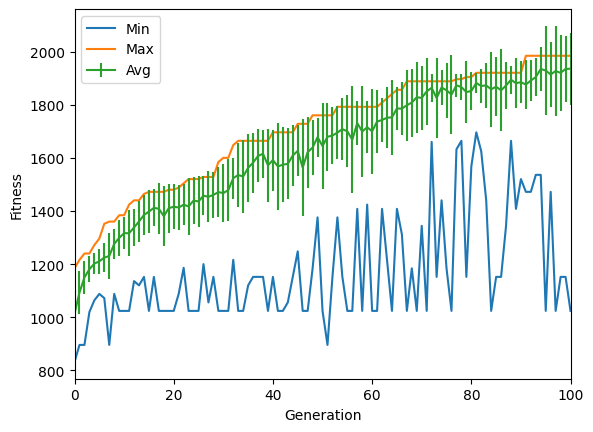

Best individual GP is or_(and_(and_(0, IN6), and_(and_(0, IN6), IN5)), if_then_else(or_(not_(IN1), if_then_else(IN2, IN9, 0)), if_then_else(IN0, if_then_else(not_(IN2), IN4, if_then_else(or_(not_(IN1), if_then_else(IN2, and_(IN6, 0), IN0)), if_then_else(IN0, if_then_else(if_then_else(1, if_then_else(IN0, if_then_else(if_then_else(1, IN8, IN5), or_(or_(IN9, IN5), IN2), not_(IN2)), if_then_else(and_(and_(or_(IN2, IN3), IN4), or_(IN2, IN5)), 0, if_then_else(IN0, IN4, if_then_else(IN10, IN5, IN10)))), IN3), 1, not_(IN2)), IN2), if_then_else(if_then_else(1, not_(1), if_then_else(if_then_else(IN2, IN9, 0), if_then_else(1, 0, 1), not_(IN2))), IN5, if_then_else(or_(IN6, if_then_else(IN0, if_then_else(IN10, IN0, IN0), or_(or_(IN2, IN3), 1))), if_then_else(IN10, or_(0, 1), not_(IN2)), IN6)))), if_then_else(and_(IN7, or_(IN2, IN3)), or_(IN5, 1), if_then_else(IN0, if_then_else(1, 0, IN5), IN1))), if_then_else(if_then_else(IN0, not_(1), if_then_else(if_then_else(IN2, IN9, 0), if_then_else(1, 0, 1),

In [41]:
import sys
import time
import random
import operator

import numpy

from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp

import utils.utils_11.plot_utils as plot_utils

runs = {'run1': {'MUX_SELECT_LINES': 3, 'GP_POP_SIZE': 60, 'GP_NGEN':100,  'GP_CXPB, GP_MUTPB': (0.7, 0.4), 'GP_TRNMT_SIZE': 7, 'GP_HOF_SIZE':4},
        #'run2': {'MUX_SELECT_LINES': 3, 'GP_POP_SIZE': 100, 'GP_NGEN':200,  'GP_CXPB, GP_MUTPB': (0.7, 0.4), 'GP_TRNMT_SIZE': 7, 'GP_HOF_SIZE':4}
        }

"""
-------------------------------------------------------------------------
Edit this part to do the exercises
"""
for run in runs:
    print('\n\n------------------------------------------------------------------------------------------------')
    print(runs[run])

    GP_POP_SIZE = runs[run]['GP_POP_SIZE']               # population size for GP
    GP_NGEN = runs[run]['GP_NGEN']                     # number of generations for GP
    GP_CXPB, GP_MUTPB = runs[run]['GP_CXPB, GP_MUTPB']     # crossover and mutation probability for GP
    GP_TRNMT_SIZE = runs[run]['GP_TRNMT_SIZE']                # tournament size for GP
    GP_HOF_SIZE = runs[run]['GP_HOF_SIZE']                  # size of the Hall-of-Fame for GP

    MUX_SELECT_LINES = runs[run]['MUX_SELECT_LINES']            # number of select lines
    seed = 0


    """
    -------------------------------------------------------------------------
    """

    def if_then_else(condition, out1, out2):
        return out1 if condition else out2

    # Initialize Multiplexer problem input and output vectors
    MUX_IN_LINES = 2 ** MUX_SELECT_LINES
    MUX_TOTAL_LINES = MUX_SELECT_LINES + MUX_IN_LINES

    # input : e.g. [A0 A1 A2 D0 D1 D2 D3 D4 D5 D6 D7] for a 8-3 mux
    inputs = [[0] * MUX_TOTAL_LINES for i in range(2 ** MUX_TOTAL_LINES)]
    outputs = [None] * (2 ** MUX_TOTAL_LINES)

    for i in range(2 ** MUX_TOTAL_LINES):
        value = i
        divisor = 2 ** MUX_TOTAL_LINES
        # Fill the input bits
        for j in range(MUX_TOTAL_LINES):
            divisor /= 2
            if value >= divisor:
                inputs[i][j] = 1
                value -= divisor
        
        # Determine the corresponding output
        indexOutput = MUX_SELECT_LINES
        for j, k in enumerate(inputs[i][:MUX_SELECT_LINES]):
            indexOutput += k * 2**j
        outputs[i] = inputs[i][indexOutput]

    pset = gp.PrimitiveSet("MAIN", MUX_TOTAL_LINES, "IN")
    pset.addPrimitive(operator.and_, 2)
    pset.addPrimitive(operator.or_, 2)
    pset.addPrimitive(operator.not_, 1)
    pset.addPrimitive(if_then_else, 3)
    pset.addTerminal(1)
    pset.addTerminal(0)

    try:
        del creator.FitnessMaxMux
        del creator.IndividualMux
    except:
        pass
    creator.create("FitnessMaxMux", base.Fitness, weights=(1.0,))
    creator.create("IndividualMux", gp.PrimitiveTree, fitness=creator.FitnessMaxMux)

    toolbox = base.Toolbox()
    toolbox.register("expr", gp.genFull, pset=pset, min_=2, max_=4)
    toolbox.register("individual", tools.initIterate, creator.IndividualMux, toolbox.expr)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("compile", gp.compile, pset=pset)

    def evalMultiplexer(individual):
        func = toolbox.compile(expr=individual)
        return sum(func(*in_) == out for in_, out in zip(inputs, outputs)),

    toolbox.register("evaluate", evalMultiplexer)
    toolbox.register("select", tools.selTournament, tournsize=GP_TRNMT_SIZE)
    toolbox.register("mate", gp.cxOnePoint)
    toolbox.register("expr_mut", gp.genGrow, min_=0, max_=2)
    toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

    #--------------------------------------------------------------------

    random.seed(seed)

    pop = toolbox.population(n=GP_POP_SIZE)
    hof = tools.HallOfFame(GP_HOF_SIZE)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)

    final_pop,logbook=algorithms.eaSimple(pop, toolbox, GP_CXPB, GP_MUTPB, GP_NGEN, \
                                        stats, halloffame=hof)

    #--------------------------------------------------------------------

    # plot GP tree
    nodes, edges, labels = gp.graph(hof[0])
    #plot_utils.plotTree(nodes,edges,labels,'multiplexer_'+str(seed),'results')

    # plot fitness trends
    plot_utils.plotTrends(logbook,'multiplexer_'+str(seed),'results')

    #--------------------------------------------------------------------

    print("Best individual GP is %s, %s" % (hof[0], hof[0].fitness.values))



# Spam Base problem



------------------------------------------------------------------------------------------------
{'GP_POP_SIZE': 100, 'GP_NGEN': 40, 'GP_CXPB, GP_MUTPB': (0.5, 0.2), 'GP_TRNMT_SIZE': 3, 'GP_HOF_SIZE': 1}
gen	nevals	avg   	std    	min	max
0  	100   	194.89	47.1851	89 	301
1  	57    	230.06	38.7865	107	311
2  	50    	247.96	38.5357	137	324
3  	58    	255.18	41.8861	140	324
4  	57    	267.74	39.883 	119	324
5  	64    	279.18	32.5402	125	324
6  	48    	278.22	42.5   	111	324
7  	58    	283.75	42.3016	141	324
8  	62    	281.94	46.7397	92 	325
9  	65    	283.18	46.16  	122	325
10 	71    	280.64	43.2031	113	325
11 	66    	280.61	45.3151	142	329
12 	53    	287.54	43.4457	129	329
13 	59    	288.6 	43.4905	91 	329
14 	61    	286.4 	41.3086	155	329
15 	62    	289.29	40.7692	85 	329
16 	54    	292.05	43.735 	77 	329
17 	62    	287.46	45.2627	135	329
18 	69    	281.59	49.3919	128	329
19 	57    	290.56	43.4595	125	329
20 	58    	290.91	42.036 	150	329
21 	59    	295.39	36.0879	186	329
22 	62    	2

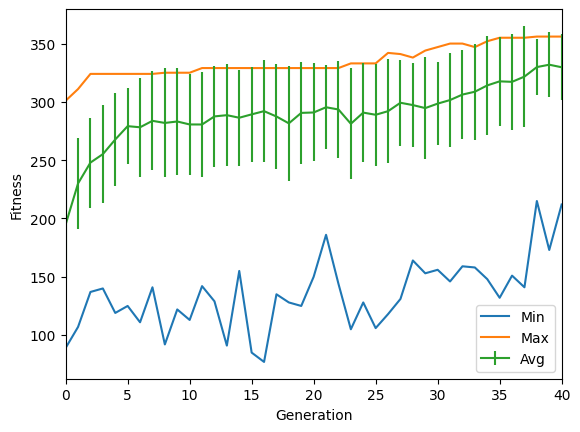

Best individual GP is lt(sub(sub(IN50, mul(IN52, protectedDiv(IN6, if_then_else(not_(True), IN0, IN35)))), IN6), IN15), (356.0,)


------------------------------------------------------------------------------------------------
{'GP_POP_SIZE': 100, 'GP_NGEN': 150, 'GP_CXPB, GP_MUTPB': (0.4, 0.3), 'GP_TRNMT_SIZE': 5, 'GP_HOF_SIZE': 2}
gen	nevals	avg   	std    	min	max
0  	100   	194.89	47.1851	89 	301
1  	55    	239.34	41.2922	140	315
2  	64    	252.83	45.0664	115	315
3  	55    	277.42	34.9165	136	318
4  	51    	285.85	43.5569	143	331
5  	68    	281.06	45.3565	152	331
6  	59    	275.27	51.8324	87 	351
7  	62    	283.39	50.183 	150	351
8  	53    	285.85	51.2276	119	351
9  	58    	294.1 	53.4654	154	351
10 	59    	303.93	43.9812	155	351
11 	59    	305.72	52.687 	129	358
12 	62    	308.42	55.8398	111	358
13 	51    	310.01	53.2962	151	358
14 	57    	314.33	53.21  	142	358
15 	75    	317.22	48.8839	137	364
16 	51    	324.75	46.0564	147	364
17 	57    	320.99	50.6858	123	364
18 	60    	322.88	

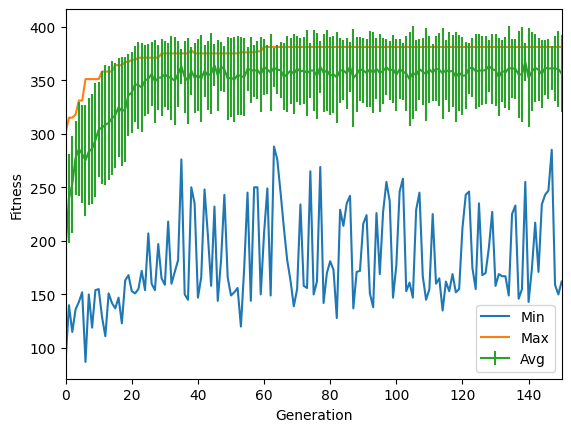

Best individual GP is lt(sub(sub(add(sub(add(sub(if_then_else(lt(protectedDiv(protectedDiv(IN35, IN11), protectedDiv(IN53, IN35)), IN29), protectedDiv(IN50, IN21), if_then_else(True, IN45, IN42)), IN6), if_then_else(False, IN3, IN24)), IN6), if_then_else(False, IN3, IN24)), IN21), IN52), IN15), (381.0,)


In [42]:
import sys
import time
import random
import operator
import csv
import itertools

import numpy

from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp

import utils.utils_11.plot_utils as plot_utils
runs = {'run1': {'GP_POP_SIZE': 100, 'GP_NGEN':40,  'GP_CXPB, GP_MUTPB': (0.5, 0.2), 'GP_TRNMT_SIZE': 3, 'GP_HOF_SIZE':1},
        'run2': {'GP_POP_SIZE': 100, 'GP_NGEN':150,  'GP_CXPB, GP_MUTPB': (0.4, 0.3), 'GP_TRNMT_SIZE': 5, 'GP_HOF_SIZE':2},
        }

"""
-------------------------------------------------------------------------
Edit this part to do the exercises
"""
for run in runs:
    print('\n\n------------------------------------------------------------------------------------------------')
    print(runs[run])

    GP_POP_SIZE = runs[run]['GP_POP_SIZE']               # population size for GP
    GP_NGEN = runs[run]['GP_NGEN']                     # number of generations for GP
    GP_CXPB, GP_MUTPB = runs[run]['GP_CXPB, GP_MUTPB']     # crossover and mutation probability for GP
    GP_TRNMT_SIZE = runs[run]['GP_TRNMT_SIZE']                # tournament size for GP
    GP_HOF_SIZE = runs[run]['GP_HOF_SIZE']                  # size of the Hall-of-Fame for GP
    seed = 0
    """
    -------------------------------------------------------------------------
    """

    # Read the spam list features and put it in a list of lists.
    # The dataset is from http://archive.ics.uci.edu/ml/datasets/Spambase
    # This example is a copy of the OpenBEAGLE example :
    # http://beagle.gel.ulaval.ca/refmanual/beagle/html/d2/dbe/group__Spambase.html
    with open("utils/utils_11/data/spambase.csv") as spambase:
        spamReader = csv.reader(spambase)
        spam = list(list(float(elem) for elem in row) for row in spamReader)

    # defined a new primitive set for strongly typed GP
    pset = gp.PrimitiveSetTyped("MAIN", itertools.repeat(float, 57), bool, "IN")

    # boolean operators
    pset.addPrimitive(operator.and_, [bool, bool], bool)
    pset.addPrimitive(operator.or_, [bool, bool], bool)
    pset.addPrimitive(operator.not_, [bool], bool)

    # floating point operators
    # Define a protected division function
    def protectedDiv(left, right):
        try: return left / right
        except ZeroDivisionError: return 1

    pset.addPrimitive(operator.add, [float,float], float)
    pset.addPrimitive(operator.sub, [float,float], float)
    pset.addPrimitive(operator.mul, [float,float], float)
    pset.addPrimitive(protectedDiv, [float,float], float)

    # logic operators
    # Define a new if-then-else function
    def if_then_else(input, output1, output2):
        if input: return output1
        else: return output2

    pset.addPrimitive(operator.lt, [float, float], bool)
    pset.addPrimitive(operator.eq, [float, float], bool)
    pset.addPrimitive(if_then_else, [bool, float, float], float)

    # terminals
    try:
        pset.addEphemeralConstant("rand100", lambda: random.random() * 100, float)
    except:
        print("EphemeralConstant is already defined, if you changed it restart the kernel")
    pset.addTerminal(False, bool)
    pset.addTerminal(True, bool)

    try:
        del creator.FitnessMaxSpam
        del creator.IndividualSpam
    except:
        pass
    creator.create("FitnessMaxSpam", base.Fitness, weights=(1.0,))
    creator.create("IndividualSpam", gp.PrimitiveTree, fitness=creator.FitnessMaxSpam)
        
    toolbox = base.Toolbox()
    toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
    toolbox.register("individual", tools.initIterate, creator.IndividualSpam, toolbox.expr)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("compile", gp.compile, pset=pset)

    def evalSpambase(individual):
        # Transform the tree expression in a callable function
        func = toolbox.compile(expr=individual)
        # Randomly sample 400 mails in the spam database
        spam_samp = random.sample(spam, 400)
        # Evaluate the sum of correctly identified mail as spam
        result = sum(bool(func(*mail[:57])) is bool(mail[57]) for mail in spam_samp)
        return result,
        
    toolbox.register("evaluate", evalSpambase)
    toolbox.register("select", tools.selTournament, tournsize=GP_TRNMT_SIZE)
    toolbox.register("mate", gp.cxOnePoint)
    toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
    toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

    #--------------------------------------------------------------------

    random.seed(seed)

    pop = toolbox.population(n=GP_POP_SIZE)
    hof = tools.HallOfFame(GP_HOF_SIZE)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)

    final_pop,logbook=algorithms.eaSimple(pop, toolbox, GP_CXPB, GP_MUTPB, GP_NGEN, \
                                        stats, halloffame=hof)

    #--------------------------------------------------------------------

    # plot GP tree
    nodes, edges, labels = gp.graph(hof[0])
    #plot_utils.plotTree(nodes,edges,labels,'spambase_'+str(seed),'results')

    # plot fitness trends
    plot_utils.plotTrends(logbook,'spambase_'+str(seed),'results')

    #--------------------------------------------------------------------

    print("Best individual GP is %s, %s" % (hof[0], hof[0].fitness.values))


# Ant problem



------------------------------------------------------------------------------------------------
{'GP_POP_SIZE': 300, 'GP_NGEN': 15, 'GP_CXPB, GP_MUTPB': (0.4, 0.3), 'GP_TRNMT_SIZE': 5, 'GP_HOF_SIZE': 2}
gen	nevals	avg    	std    	min	max
0  	300   	1.96333	3.36085	0  	16 
1  	186   	4.86   	4.86762	0  	30 
2  	169   	8.28667	6.47646	0  	35 
3  	183   	9.85667	8.0085 	0  	35 
4  	179   	12.8667	10.376 	0  	43 
5  	158   	17.2467	12.0667	0  	43 
6  	189   	19.27  	13.7914	0  	48 
7  	175   	21.76  	15.7235	0  	87 
8  	171   	25.5133	16.9049	0  	87 
9  	183   	27.8267	20.6911	0  	87 
10 	170   	35.0267	25.2573	0  	88 
11 	184   	39.2   	31.9046	0  	88 
12 	172   	47.35  	36.1563	0  	89 
13 	190   	57.86  	36.7065	0  	89 
14 	168   	56.3533	38.6903	0  	89 
15 	168   	60.0333	37.1173	0  	89 


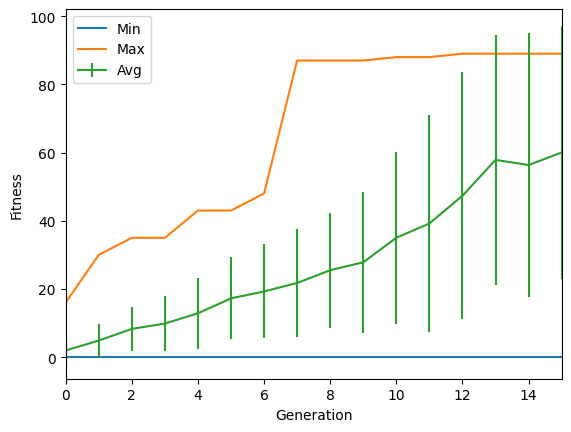

Best individual GP is prog2(turn_left, prog3(if_food_ahead(prog3(move_forward, turn_left, turn_left), turn_left), if_food_ahead(turn_left, turn_left), prog2(if_food_ahead(prog2(if_food_ahead(move_forward, turn_left), move_forward), turn_left), move_forward))), (89.0,)


In [43]:
import sys
import time
import copy
import random

import numpy

from functools import partial

from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp
import utils.utils_11.plot_utils as plot_utils

runs = {#'run1': {'GP_POP_SIZE': 300, 'GP_NGEN':40,  'GP_CXPB, GP_MUTPB': (0.5, 0.2), 'GP_TRNMT_SIZE': 7, 'GP_HOF_SIZE':1},
        'run2': {'GP_POP_SIZE': 300, 'GP_NGEN':15,  'GP_CXPB, GP_MUTPB': (0.4, 0.3), 'GP_TRNMT_SIZE': 5, 'GP_HOF_SIZE':2},
       
        }


for run in runs:
    print('\n\n------------------------------------------------------------------------------------------------')
    print(runs[run])

    GP_POP_SIZE = runs[run]['GP_POP_SIZE']               # population size for GP
    GP_NGEN = runs[run]['GP_NGEN']                     # number of generations for GP
    GP_CXPB, GP_MUTPB = runs[run]['GP_CXPB, GP_MUTPB']     # crossover and mutation probability for GP
    GP_TRNMT_SIZE = runs[run]['GP_TRNMT_SIZE']                # tournament size for GP
    GP_HOF_SIZE = runs[run]['GP_HOF_SIZE']                  # size of the Hall-of-Fame for GP
    seed = 0
    
    """
    -------------------------------------------------------------------------
    """

    def progn(*args):
        for arg in args:
            arg()

    def prog2(out1, out2): 
        return partial(progn,out1,out2)

    def prog3(out1, out2, out3):     
        return partial(progn,out1,out2,out3)

    def if_then_else(condition, out1, out2):
        out1() if condition() else out2()

    class AntSimulator(object):
        direction = ["north","east","south","west"]
        dir_row = [1, 0, -1, 0]
        dir_col = [0, 1, 0, -1]
        
        def __init__(self, max_moves):
            self.max_moves = max_moves
            self.moves = 0
            self.eaten = 0
            self.routine = None
            
        def _reset(self):
            self.row = self.row_start 
            self.col = self.col_start 
            self.dir = 1
            self.moves = 0  
            self.eaten = 0
            self.matrix_exc = copy.deepcopy(self.matrix)

        @property
        def position(self):
            return (self.row, self.col, self.direction[self.dir])
                
        def turn_left(self): 
            if self.moves < self.max_moves:
                self.moves += 1
                self.dir = (self.dir - 1) % 4

        def turn_right(self):
            if self.moves < self.max_moves:
                self.moves += 1    
                self.dir = (self.dir + 1) % 4
            
        def move_forward(self):
            if self.moves < self.max_moves:
                self.moves += 1
                self.row = (self.row + self.dir_row[self.dir]) % self.matrix_row
                self.col = (self.col + self.dir_col[self.dir]) % self.matrix_col
                if self.matrix_exc[self.row][self.col] == "food":
                    self.eaten += 1
                self.matrix_exc[self.row][self.col] = "passed"

        def sense_food(self):
            ahead_row = (self.row + self.dir_row[self.dir]) % self.matrix_row
            ahead_col = (self.col + self.dir_col[self.dir]) % self.matrix_col        
            return self.matrix_exc[ahead_row][ahead_col] == "food"
    
        def if_food_ahead(self, out1, out2):
            return partial(if_then_else, self.sense_food, out1, out2)
    
        def run(self,routine):
            self._reset()
            while self.moves < self.max_moves:
                routine()
        
        def parse_matrix(self, matrix):
            self.matrix = list()
            for i, line in enumerate(matrix):
                self.matrix.append(list())
                for j, col in enumerate(line):
                    if col == "#":
                        self.matrix[-1].append("food")
                    elif col == ".":
                        self.matrix[-1].append("empty")
                    elif col == "S":
                        self.matrix[-1].append("empty")
                        self.row_start = self.row = i
                        self.col_start = self.col = j
                        self.dir = 1
            self.matrix_row = len(self.matrix)
            self.matrix_col = len(self.matrix[0])
            self.matrix_exc = copy.deepcopy(self.matrix)

    ant = AntSimulator(600)

    pset = gp.PrimitiveSet("MAIN", 0)
    pset.addPrimitive(ant.if_food_ahead, 2)
    pset.addPrimitive(prog2, 2)
    pset.addPrimitive(prog3, 3)
    pset.addTerminal(ant.move_forward)
    pset.addTerminal(ant.turn_left)
    pset.addTerminal(ant.turn_right)

    try:
        del creator.FitnessMaxAnt
        del creator.IndividualAnt
    except:
        pass
    creator.create("FitnessMaxAnt", base.Fitness, weights=(1.0,))
    creator.create("IndividualAnt", gp.PrimitiveTree, fitness=creator.FitnessMaxAnt)
        
    toolbox = base.Toolbox()

    # Attribute generator
    toolbox.register("expr_init", gp.genFull, pset=pset, min_=1, max_=2)

    # Structure initializers
    toolbox.register("individual", tools.initIterate, creator.IndividualAnt, toolbox.expr_init)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    def evalArtificialAnt(individual):
        # Transform the tree expression to functionnal Python code
        routine = gp.compile(individual, pset)
        # Run the generated routine
        ant.run(routine)
        return ant.eaten,

    toolbox.register("evaluate", evalArtificialAnt)
    toolbox.register("select", tools.selTournament, tournsize=GP_TRNMT_SIZE)
    toolbox.register("mate", gp.cxOnePoint)
    toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
    toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

    #--------------------------------------------------------------------

    random.seed(seed)

    with  open("utils/utils_11/data/santafe_trail.txt") as trail_file:
        ant.parse_matrix(trail_file)

    pop = toolbox.population(n=GP_POP_SIZE)
    hof = tools.HallOfFame(GP_HOF_SIZE)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)

    final_pop,logbook=algorithms.eaSimple(pop, toolbox, GP_CXPB, GP_MUTPB, GP_NGEN, \
                                        stats, halloffame=hof)

    #--------------------------------------------------------------------

    # plot GP tree
    nodes, edges, labels = gp.graph(hof[0])
    #plot_utils.plotTree(nodes,edges,labels,'ant_'+str(seed),'results')

    # plot fitness trends
    plot_utils.plotTrends(logbook,'ant_'+str(seed),'results')

    #--------------------------------------------------------------------

    print("Best individual GP is %s, %s" % (hof[0], hof[0].fitness.values))

# Instructions and questions

Concisely note down your observations from the previous exercises (follow the bullet points) and think about the following questions. 

 - What are the main strengths and limitations of GP, in your opinion?

 Pro: Adaptability&Flexibility GP was able to solve a variety of tasks, such as the parity problem, multiplexer problem, spam classification, and maze navigation. Interpretability: The evolved solutions (e.g., Boolean expressions or decision trees) are more interpretable compared to black-box models like neural networks.

 Cons: Impact of Parameters & Computational Complexity: Performance is heavily influenced by parameters like population size, tree depth, mutation rate, and crossover rate. Overfitting: In tasks like spam classification, increasing tree complexity often led to overfitting, which reduced generalization performance.

 
 - In which kind of applications do you think that GP could be more useful than other kinds of black-box Machine Learning techniques, such as Neural Network? Why?

 Symbolic Regression:
    Why GP: GP can evolve mathematical expressions that describe relationships in data, providing explicit formulas rather than black-box predictions.

 Boolean Logic Problems (e.g., Parity, Multiplexer):
    Why GP: GP can evolve interpretable Boolean expressions, making it well-suited for tasks that require logical reasoning.

 Program Synthesis and Automation:
    Why GP: GP can evolve small programs or scripts to automate tasks, such as controlling agents (e.g., maze navigation or the artificial ant problem).

 Interpretable Models:
    Why GP: In domains where transparency and interpretability are essential (e.g., medical diagnosis, legal decision-making), GP provides solutions that are easier to understand compared to neural networks.

 Optimization Problems with No Differentiable Objective:
    Why GP: GP does not rely on gradient information, making it suitable for optimization tasks where the objective function is non-differentiable or discontinuous.

Automated Feature Engineering:
    Why GP: GP can automatically generate combinations of features and functions, which is beneficial in domains where feature interactions are complex and unknown.


# BONUS
In the enxt cell there is a variant of the first exercise. The main difference between this and the original exercise is that in this variant a _competitive co-evolutionary approach_ is used for solving the symbolic regression problem. Rather than determining _a priori_ the samples that are used for evolving the GP trees, this approach uses a Genetic Algorithm (GA) to _evolve_ a fix-sized set of samples that is fed to a tree evolved by GP. The goal of GP is to _minimize_ the MSE, while the goal of GA is to _maximize_ it, i.e. to generate a set of samples that produces the largest fitting error in the evolving GP trees. 

To do so, at the initial generation a random GA (GP) individual is sampled from the corresponding initial population and tested against all individuals in the initial population of GP (GA). Then at each subsequent generation the best GA individual (i.e., the set of samples that produced the largest MSE so far) is fed to all the trees in the current GP population. Vice versa, the best GP tree (i.e., the one that showed the lowest MSE so far) is fed with all the individuals (i.e., sets of samples) in the current GA population. This form of _arms race_ forces the GP trees to become more adaptive, avoiding overfitting to a particular set of samples, thus also becoming better at generalizing and extrapolating data outside the specific set of samples that was used for fitting. Note, however, that in some cases this approach may lead to excessively large trees that are even impossible to evaluate$^{[1]}$. Indeed, due to an implicit limitation of Python, trees deeper than 90 layers cannot be evaluated. In these cases the script gives the following error:
`MemoryError: DEAP : Error in tree evaluation : Python cannot evaluate a tree higher than 90. To avoid this problem, you should use bloat control on your operators. See the DEAP documentation for more information. DEAP will now abort`.

Run some tests with the co-evolutionary variant of the symbolic regression experiment. At the end of the evolutionary process, you should see a separate fitness trend for the GA and the GP evolution. 

 - Is this approach better (in terms of time to converge, approximation results, and robustness across multiple runs) than the one based on GP alone? Why?
 - Try to change the parameters of the co-evolutionary scheme to test how the system behaves under different configurations. Focus in particular on the population size used in the two algorithms (`GA_POP_SIZE` and `GP_POP_SIZE`), and the number of samples contained in each GA individual (`GA_REP_IND`). 



---
[1]: This is the typical effect of _bloat_. In the most extreme cases, this could even cause an internal Python `MemoryError`


In [44]:
import os

import sys
import time
import random
import operator
import math

import numpy

from deap import base
from deap import creator
from deap import tools
from deap import gp

import utils.utils_11.plot_utils as plot_utils
"""
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

GA_POP_SIZE = 200               # population size for GA
NGEN = 50                       # number of generations (for both GA and GP)
GA_TRNMT_SIZE = 3               # tournament size for GA
GA_REP_IND = 10                 # number of arrays for each GA individual
GA_CXPB, GA_MUTPB = 0.5, 0.2    # crossover and mutation probability for GA


GP_POP_SIZE = 200               # population size for GP
GP_NGEN = 40                    # number of generations for GP
GP_CXPB, GP_MUTPB = 0.5, 0.2    # crossover and mutation probability for GP
GP_TRNMT_SIZE = 3               # tournament size for GP
GP_HOF_SIZE = 1                 # size of the Hall-of-Fame for GP

seed = 0
"""
-------------------------------------------------------------------------
"""

try:
    del creator.FitnessMaxGA
    del creator.IndividualGA
except:
    pass
creator.create("FitnessMaxGA", base.Fitness, weights=(1.0,))
creator.create("IndividualGA", list, fitness=creator.FitnessMaxGA)
    
toolbox_ga = base.Toolbox()

toolbox_ga.register("float", random.uniform, -1, 1)
toolbox_ga.register("individual", tools.initRepeat, creator.IndividualGA, toolbox_ga.float, GA_REP_IND)
toolbox_ga.register("population", tools.initRepeat, list, toolbox_ga.individual)

toolbox_ga.register("select", tools.selTournament, tournsize=GA_TRNMT_SIZE)
toolbox_ga.register("mate", tools.cxTwoPoint)
# we leave the internal parameters of mutation (mu, sigma and indpb) as they are
toolbox_ga.register("mutate", tools.mutGaussian, mu=0, sigma=0.01, indpb=0.05)

def protectedDiv(left, right):
    try:
        return left / right
    except ZeroDivisionError:
        return 1

pset = gp.PrimitiveSet("MAIN", 1)

pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
pset.addPrimitive(protectedDiv, 2)
pset.addPrimitive(operator.neg, 1)
pset.addPrimitive(math.cos, 1)
pset.addPrimitive(math.sin, 1)

try:
    pset.addEphemeralConstant("rand101", lambda: random.randint(-1,1))
except:
    print("EphemeralConstant is already defined, if you changed it restart the kernel")
pset.renameArguments(ARG0='x')

try:
    del creator.FitnessMinGP
    del creator.IndividualGP
except:
    pass
creator.create("FitnessMinGP", base.Fitness, weights=(-1.0,))
creator.create("IndividualGP", gp.PrimitiveTree, fitness=creator.FitnessMinGP)

toolbox_gp = base.Toolbox()
toolbox_gp.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox_gp.register("individual", tools.initIterate, creator.IndividualGP, toolbox_gp.expr)
toolbox_gp.register("population", tools.initRepeat, list, toolbox_gp.individual)
toolbox_gp.register("compile", gp.compile, pset=pset)

# TODO: try to change the expression e.g. to include trigonometric functions
def generatorFunction(x):
    #return math.sin(x)+math.cos(x)
    #return math.sin(x)*x**2
    #return math.sin(x)+5*x**2
    return x**4 + x**3 + x**2 + x

def evalSymbReg(individual, points):
    # Transform the tree expression in a callable function
    gpFunction = toolbox_gp.compile(expr=individual)
    # Evaluate the mean squared error between the expression and the real function
    sqerrors = ((gpFunction(x) - generatorFunction(x))**2 for x in points)
    return math.fsum(sqerrors) / len(points),

toolbox_gp.register("evaluate", evalSymbReg, points=[x/10. for x in range(-10,10)])
toolbox_gp.register("select", tools.selTournament, tournsize=GP_TRNMT_SIZE)
toolbox_gp.register("mate", gp.cxOnePoint)
toolbox_gp.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox_gp.register("mutate", gp.mutUniform, expr=toolbox_gp.expr_mut, pset=pset)

toolbox_gp.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
toolbox_gp.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))

#--------------------------------------------------------------------
random.seed(seed)

pop_ga = toolbox_ga.population(n=GA_POP_SIZE)
pop_gp = toolbox_gp.population(n=GP_POP_SIZE)

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

logbook = tools.Logbook()
logbook.header = "gen", "type", "evals", "std", "min", "avg", "max"

best_ga = tools.selRandom(pop_ga, 1)[0]
best_gp = tools.selRandom(pop_gp, 1)[0]

for ind in pop_gp:
    ind.fitness.values = toolbox_gp.evaluate(ind, points=best_ga)  

for ind in pop_ga:
    ind.fitness.values = toolbox_gp.evaluate(best_gp, points=ind)

record = stats.compile(pop_ga)
logbook.record(gen=0, type='ga', evals=len(pop_ga), **record)

record = stats.compile(pop_gp)
logbook.record(gen=0, type='gp', evals=len(pop_gp), **record)

print(logbook.stream)

# Begin the evolution
for g in range(1, NGEN):
    # Select and clone the offspring
    off_ga = toolbox_ga.select(pop_ga, len(pop_ga))
    off_gp = toolbox_gp.select(pop_gp, len(pop_gp))
    off_ga = [toolbox_ga.clone(ind) for ind in off_ga]        
    off_gp = [toolbox_gp.clone(ind) for ind in off_gp]

    # Apply crossover and mutation
    for ind1, ind2 in zip(off_ga[::2], off_ga[1::2]):
        if random.random() < GA_CXPB:
            toolbox_ga.mate(ind1, ind2)
            del ind1.fitness.values
            del ind2.fitness.values

    for ind1, ind2 in zip(off_gp[::2], off_gp[1::2]):
        if random.random() < GP_CXPB:
            toolbox_gp.mate(ind1, ind2)
            del ind1.fitness.values
            del ind2.fitness.values

    for ind in off_ga:
        if random.random() < GA_MUTPB:
            toolbox_ga.mutate(ind)
            del ind.fitness.values

    for ind in off_gp:
        if random.random() < GP_MUTPB:
            toolbox_gp.mutate(ind)
            del ind.fitness.values

    # Evaluate the individuals with an invalid fitness
    for ind in off_ga:
        ind.fitness.values = toolbox_gp.evaluate(best_gp, points=ind)

    for ind in off_gp:
        ind.fitness.values = toolbox_gp.evaluate(ind, points=best_ga)

    # Replace the old population by the offspring
    pop_ga = off_ga
    pop_gp = off_gp

    record = stats.compile(pop_ga)
    logbook.record(gen=g, type='ga', evals=len(pop_ga), **record)

    record = stats.compile(pop_gp)
    logbook.record(gen=g, type='gp', evals=len(pop_gp), **record)
    print(logbook.stream)

    best_ga = tools.selBest(pop_ga, 1)[0]
    best_gp = tools.selBest(pop_gp, 1)[0]

#--------------------------------------------------------------------

# plot GP tree

nodes, edges, labels = gp.graph(best_gp)

plot_utils.plotTree(nodes,edges,labels,'coev_'+str(seed),'results')

#--------------------------------------------------------------------

# plot fitness trends
import matplotlib.pyplot as plt

import os
folder = 'results'
if folder is not None and not os.path.exists(folder):
    os.makedirs(folder)
name = 'coev_'+str(seed)

gen = numpy.array(logbook.select("gen"))
fit_type = numpy.array(logbook.select("type"))
fit_min = numpy.array(logbook.select("min"))
fit_max = numpy.array(logbook.select("max"))
fit_avg = numpy.array(logbook.select("avg"))
fit_std = numpy.array(logbook.select("std"))

ga_entries = numpy.array([i for i,val in enumerate(fit_type) if val=='ga'])
gp_entries = numpy.array([i for i,val in enumerate(fit_type) if val=='gp'])

fig = plt.figure("GA (fitness trend)")
ax1 = fig.add_subplot(111)
line1 = ax1.plot(gen[ga_entries], fit_min[ga_entries], label="Min")
line2 = ax1.plot(gen[ga_entries], fit_max[ga_entries], label="Max")
line3 = ax1.errorbar(gen[ga_entries], fit_avg[ga_entries], yerr=fit_std[ga_entries], label="Avg")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness")
ax1.set_yscale("log")
ax1.set_xlim(0,len(gen[ga_entries])-1)
ax1.set_title('GA')
ax1.legend()
plt.savefig(folder+'/'+'trends_'+name+'_ga.png')

fig = plt.figure("GP (fitness trend)")
ax2 = fig.add_subplot(111)
line1 = ax2.plot(gen[gp_entries], fit_min[gp_entries], label="Min")
line2 = ax2.plot(gen[gp_entries], fit_max[gp_entries], label="Max")
line3 = ax2.errorbar(gen[gp_entries], fit_avg[gp_entries], yerr=fit_std[gp_entries], label="Avg")
ax2.set_xlabel("Generation")
ax2.set_ylabel("Fitness")
ax2.set_yscale("log")
ax2.set_xlim(0,len(gen[gp_entries])-1)
ax2.set_title('GP')
ax2.legend()
plt.savefig(folder+'/'+'trends_'+name+'_gp.png')

plt.show()

# plot real vs. GP-approximated values
x_ = points=[x/10. for x in range(-100,100)]
y_real = [generatorFunction(x) for x in x_]
gpFunction = toolbox_gp.compile(expr=best_gp)
y_gp = [gpFunction(x) for x in x_]
fig = plt.figure("GP (real vs approximated values)")
ax1 = fig.add_subplot(111)
line1 = ax1.plot(x_, y_real, label="Real")
line2 = ax1.plot(x_, y_gp, label="GP")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.legend()
plt.show()

#--------------------------------------------------------------------

print("Best individual GA is %s, %s" % (best_ga, best_ga.fitness.values))
print("Best individual GP is %s, %s" % (best_gp, best_gp.fitness.values))

gen	type	evals	std    	min    	avg    	max    
0  	ga  	200  	1.61967	0.27035	2.93816	7.58641
0  	gp  	200  	18.0874	0.11276	3.84526	187.672
1  	ga  	200  	1.5664 	0.346296	4.39273	9.18965
1  	gp  	200  	7.64149	0.11276 	2.03105	56.4984
2  	ga  	200  	0.200735	0.10575 	0.656333	1.17537
2  	gp  	200  	3.17444 	1.20362 	3.99318 	29.0313
3  	ga  	200  	0.265804	0.405208	1.00062 	1.7474 
3  	gp  	200  	2.01306 	0.24432 	2.91684 	18.1022
4  	ga  	200  	0.0704077	0.0693574	0.295281	0.490252
4  	gp  	200  	30.2666  	0.418349 	7.72078 	201.336 
5  	ga  	200  	0.0641799	0.172328 	0.353578	0.560634
5  	gp  	200  	41.6154  	0.490252 	5.62756 	591.724 
6  	ga  	200  	0.0725247	0.191406 	0.416629	0.635153
6  	gp  	200  	2.2321   	0.302746 	2.11415 	13.3321 
7  	ga  	200  	0.144963 	0.148556 	0.4682  	0.826204
7  	gp  	200  	2.39779  	0.051204 	2.15792 	14.6213 
8  	ga  	200  	0.0268996	0.0170342	0.0967201	0.178217
8  	gp  	200  	28.7733  	0.142499 	3.83058  	408.911 
9  	ga  	200  	0.0234382	0.0524

ImportError: requires pygraphviz http://pygraphviz.github.io/

<Figure size 640x480 with 0 Axes>